In [ ]:
from urllib.request import urlretrieve
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
urlretrieve('https://github.com/SerjiEvg/data-analysis/raw/main/data/grades.csv', 'grades.csv')
df = pd.read_csv('grades.csv')
df.head()


,Год окончания,Пол,Семейное положение,Тип диплома,Кредит,Зарплата,Платеж,Сбережения (руб.)
0,2004,Муж.,Одинокий(ая),Стандартный диплом,Да,125000,10869,"86,000 руб."
1,2005,Муж.,Женатый(замужем),Диплом колледжа,Нет,100000,10869,"116,000 руб."
2,2006,Жен.,Одинокий(ая),Стандартный диплом,Да,70000,10869,"52,000 руб."
3,2007,Муж.,Женатый(замужем),Стандартный диплом,Нет,120000,10869,"76,000 руб."
4,2006,Жен.,В разводе,Стандартный диплом,Да,95000,11948,"52,000 руб."


In [ ]:
df.tail()

,Год окончания,Пол,Семейное положение,Тип диплома,Кредит,Зарплата,Платеж,Сбережения (руб.)
83,2007,Муж.,Одинокий(ая),Стандартный диплом,Нет,75000,12066,"16,000 руб."
84,2008,M,Одинокий(ая),Диплом колледжа,Да,65000,12066,"72,000 руб."
85,2009,Муж.,Женатый(замужем),Стандартный диплом,Нет,75000,12066,"46,000 руб."
86,2005,Жен.,В разводе,Стандартный диплом,Да,100000,12067,"32,000 руб."
87,2006,Муж.,Женатый(замужем),Стандартный диплом,Да,75000,12067,"67,000 руб."


In [ ]:
df.dtypes

Год окончания          int64
Пол                   object
Семейное положение    object
Тип диплома           object
Кредит                object
Зарплата               int64
Платеж                 int64
Сбережения (руб.)     object
dtype: object

In [ ]:
df.describe()

,Год окончания,Зарплата,Платеж
count,88.000000,88.000000,88.000000
mean,2006.477273,84090.909091,11708.727273
std,1.560852,21234.128008,1110.647949
min,2004.000000,35000.000000,10869.000000
25%,2005.000000,75000.000000,10968.000000
50%,2006.500000,75000.000000,11696.000000
75%,2008.000000,90000.000000,12058.250000
max,2009.000000,160000.000000,20960.000000


In [ ]:
df["Сбережения (руб.)"] = df["Сбережения (руб.)"].replace(',','', regex=True).replace('руб.','', regex=True).replace(' ','', regex=True).astype(int)
df["Сбережения (руб.)"].dtypes

dtype('int64')

In [ ]:
df["Пол"].value_counts()

Муж.    46
Жен.    39
M        3
Name: Пол, dtype: int64

In [ ]:
df["Пол"] = df["Пол"].replace('M', 'Муж.')
df['Пол'].value_counts()

Муж.    49
Жен.    39
Name: Пол, dtype: int64

In [ ]:
df.isnull().any()
#df.dropna

Год окончания         False
Пол                   False
Семейное положение    False
Тип диплома           False
Кредит                False
Зарплата              False
Платеж                False
Сбережения (руб.)     False
dtype: bool

In [ ]:
print("Медиана", df['Зарплата'].median())
print("Среднее значение", df['Зарплата'].mean())
print("Стандартное отклонение", df['Зарплата'].std())

Медиана 75000.0
Среднее значение 84090.90909090909
Стандартное отклонение 21234.1280081736


In [ ]:
df.loc[(df['Платеж'] > 15000)]




,Год окончания,Пол,Семейное положение,Тип диплома,Кредит,Зарплата,Платеж,Сбережения (руб.)
18,2006,Муж.,Женатый(замужем),Стандартный диплом,Нет,140000,20960,72000


<BarContainer object of 2 artists>

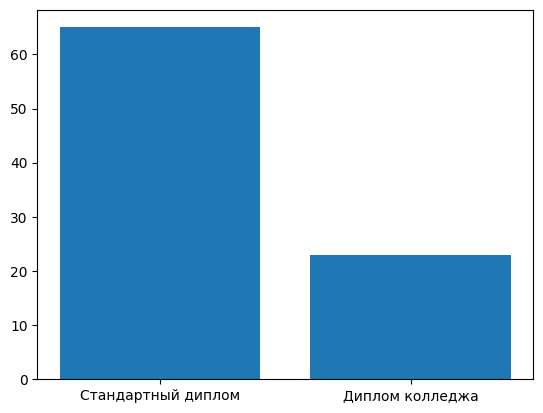

In [ ]:
plt.bar(df['Тип диплома'].unique(), df['Тип диплома'].value_counts())

In [ ]:
#sns.countplot(x = 'Зарплата', hue = 'Сбережения (руб.)', data = df.head())
#plt.bar(df['Зарплата'].head(10), df['Сбережения (руб.)'].head(10))

<Axes: >

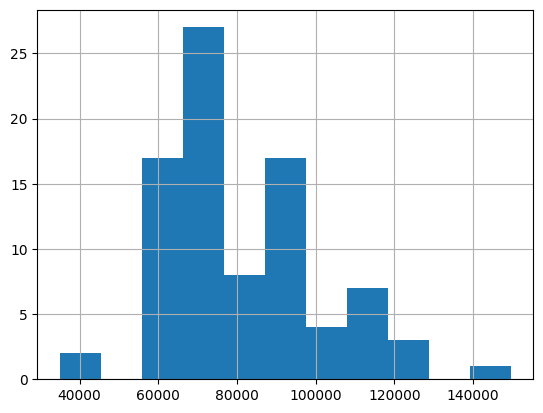

In [ ]:
df['Зарплата'].hist(bins = np.arange(df['Зарплата'].min(), df['Зарплата'].max(), step = (df['Зарплата'].max() - df['Зарплата'].min()) / 12))


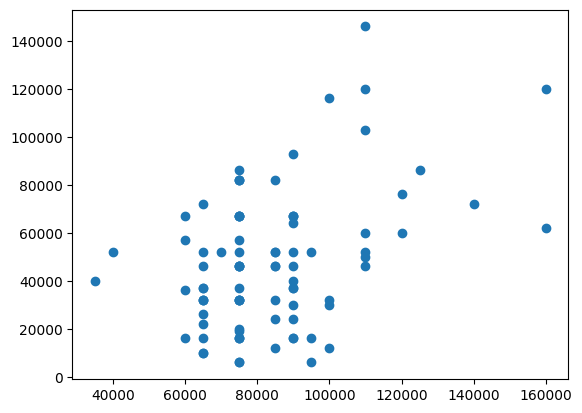

In [ ]:
plt.scatter(df['Зарплата'], df['Сбережения (руб.)'])

In [ ]:
urlretrieve('https://github.com/SerjiEvg/data-analysis/raw/main/data/countries.csv', 'countries.csv')
countries = pd.read_csv('countries.csv')
countries.head()

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987
1,Albania,Europe,2877800.0,78.57,2.89,11803.431
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839
3,Andorra,Europe,77265.0,83.73,NaN,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495


In [ ]:
countries.shape

(210, 6)

In [ ]:
countries['continent'].unique

<bound method Series.unique of 0        Asia
1      Europe
2      Africa
3      Europe
4      Africa
        ...  
205      Asia
206    Africa
207      Asia
208    Africa
209    Africa
Name: continent, Length: 210, dtype: object>

In [ ]:
countries['population'].sum()

7757980095.0

In [ ]:
countries.sort_values(by = 'population', ascending=False).head(10)

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
41,China,Asia,1.439324e+09,76.91,4.34,15308.712
90,India,Asia,1.380004e+09,69.66,0.53,6426.674
199,United States,North America,3.310026e+08,78.86,2.77,54225.446
91,Indonesia,Asia,2.735236e+08,71.72,1.04,11188.744
145,Pakistan,Asia,2.208923e+08,67.27,0.60,5034.708
27,Brazil,South America,2.125594e+08,75.88,2.20,14103.452
141,Nigeria,Africa,2.061396e+08,54.69,NaN,5338.454
15,Bangladesh,Asia,1.646894e+08,72.59,0.80,3523.984
157,Russia,Europe,1.459345e+08,72.58,8.05,24765.954
125,Mexico,North America,1.289328e+08,75.05,1.38,17336.469


In [ ]:
countries['countries_df'] = countries['population'] * countries['life_expectancy']

In [ ]:
countries.head()

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,countries_df
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987,2.523724e+09
1,Albania,Europe,2877800.0,78.57,2.89,11803.431,2.261087e+08
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839,3.371268e+09
3,Andorra,Europe,77265.0,83.73,NaN,NaN,6.469398e+06
4,Angola,Africa,32866268.0,61.15,NaN,5819.495,2.009772e+09


In [ ]:
countries.groupby('continent')['location'].apply(list).reset_index()

,continent,location
0,Africa,"[Algeria, Angola, Benin, Botswana, Burkina Fas..."
1,Asia,"[Afghanistan, Armenia, Azerbaijan, Bahrain, Ba..."
2,Europe,"[Albania, Andorra, Austria, Belarus, Belgium, ..."
3,North America,"[Anguilla, Antigua and Barbuda, Aruba, Bahamas..."
4,Oceania,"[Australia, Fiji, French Polynesia, Guam, New ..."
5,South America,"[Argentina, Bolivia, Brazil, Chile, Colombia, ..."


In [ ]:
countries.groupby('continent')['population'].agg('sum').reset_index()

,continent,population
0,Africa,1.339424e+09
1,Asia,4.607388e+09
2,Europe,7.485062e+08
3,North America,5.912425e+08
4,Oceania,4.095832e+07
5,South America,4.304611e+08


In [ ]:
urlretrieve('https://github.com/SerjiEvg/data-analysis/raw/main/data/covid-countries-data.csv', 'covid.csv')
covid = pd.read_csv('covid.csv')
covid.head()



,location,total_cases,total_deaths,total_tests
0,Afghanistan,38243.0,1409.0,NaN
1,Albania,9728.0,296.0,NaN
2,Algeria,45158.0,1525.0,NaN
3,Andorra,1199.0,53.0,NaN
4,Angola,2729.0,109.0,NaN


In [ ]:
covid['total_tests'].isna().value_counts()

True     122
False     90
Name: total_tests, dtype: int64

In [ ]:
covid = covid.merge(countries, on='location', how='left')
covid.head()

,location,total_cases,total_deaths,total_tests,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,countries_df
0,Afghanistan,38243.0,1409.0,NaN,Asia,38928341.0,64.83,0.50,1803.987,2.523724e+09
1,Albania,9728.0,296.0,NaN,Europe,2877800.0,78.57,2.89,11803.431,2.261087e+08
2,Algeria,45158.0,1525.0,NaN,Africa,43851043.0,76.88,1.90,13913.839,3.371268e+09
3,Andorra,1199.0,53.0,NaN,Europe,77265.0,83.73,NaN,NaN,6.469398e+06
4,Angola,2729.0,109.0,NaN,Africa,32866268.0,61.15,NaN,5819.495,2.009772e+09


In [ ]:
covid['test_per_million'] = covid['total_tests'] / 100000
covid['case_per_million'] = covid['total_cases'] / 100000
covid['death_per_million'] = covid['total_deaths'] / 100000

In [ ]:
covid.head()

,location,total_cases,total_deaths,total_tests,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,countries_df,test_per_million,case_per_million,death_per_million
0,Afghanistan,38243.0,1409.0,NaN,Asia,38928341.0,64.83,0.50,1803.987,2.523724e+09,NaN,0.38243,0.01409
1,Albania,9728.0,296.0,NaN,Europe,2877800.0,78.57,2.89,11803.431,2.261087e+08,NaN,0.09728,0.00296
2,Algeria,45158.0,1525.0,NaN,Africa,43851043.0,76.88,1.90,13913.839,3.371268e+09,NaN,0.45158,0.01525
3,Andorra,1199.0,53.0,NaN,Europe,77265.0,83.73,NaN,NaN,6.469398e+06,NaN,0.01199,0.00053
4,Angola,2729.0,109.0,NaN,Africa,32866268.0,61.15,NaN,5819.495,2.009772e+09,NaN,0.02729,0.00109


In [ ]:
covid.sort_values(by = 'test_per_million', ascending=False).head(10)

,location,total_cases,total_deaths,total_tests,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,countries_df,test_per_million,case_per_million,death_per_million
200,United States,6114406.0,185744.0,83898416.0,North America,3.310026e+08,78.86,2.77,54225.446,2.610287e+10,838.98416,61.14406,1.85744
90,India,3853406.0,67376.0,44337201.0,Asia,1.380004e+09,69.66,0.53,6426.674,9.613111e+10,443.37201,38.53406,0.67376
158,Russia,1005000.0,17414.0,37176827.0,Europe,1.459345e+08,72.58,8.05,24765.954,1.059192e+10,371.76827,10.05000,0.17414
199,United Kingdom,338676.0,41514.0,13447568.0,Europe,6.788600e+07,81.32,2.54,39753.244,5.520490e+09,134.47568,3.38676,0.41514
73,Germany,246116.0,9321.0,11208091.0,Europe,8.378394e+07,81.33,8.00,45229.245,6.814148e+09,112.08091,2.46116,0.09321
194,Turkey,273301.0,6462.0,7247935.0,Asia,8.433907e+07,77.69,2.81,25129.341,6.552302e+09,72.47935,2.73301,0.06462
198,United Arab Emirates,71540.0,387.0,7177430.0,Asia,9.890400e+06,77.97,1.20,67293.483,7.711545e+08,71.77430,0.71540,0.00387
178,Spain,479554.0,29194.0,6416533.0,Europe,4.675478e+07,83.56,2.97,34272.360,3.906830e+09,64.16533,4.79554,0.29194
10,Australia,25923.0,663.0,6255797.0,Oceania,2.549988e+07,83.44,3.84,44648.710,2.127710e+09,62.55797,0.25923,0.00663
35,Canada,129923.0,9135.0,5545473.0,North America,3.774216e+07,82.43,2.50,44017.591,3.111086e+09,55.45473,1.29923,0.09135


In [ ]:
covid.sort_values(by = 'case_per_million', ascending=False).head(10)

,location,total_cases,total_deaths,total_tests,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,countries_df,test_per_million,case_per_million,death_per_million
208,World,26059065.0,863535.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260.59065,8.63535
200,United States,6114406.0,185744.0,83898416.0,North America,3.310026e+08,78.86,2.77,54225.446,2.610287e+10,838.98416,61.14406,1.85744
27,Brazil,3997865.0,123780.0,4797948.0,South America,2.125594e+08,75.88,2.20,14103.452,1.612901e+10,47.97948,39.97865,1.23780
90,India,3853406.0,67376.0,44337201.0,Asia,1.380004e+09,69.66,0.53,6426.674,9.613111e+10,443.37201,38.53406,0.67376
158,Russia,1005000.0,17414.0,37176827.0,Europe,1.459345e+08,72.58,8.05,24765.954,1.059192e+10,371.76827,10.05000,0.17414
151,Peru,663437.0,29259.0,584232.0,South America,3.297185e+07,76.74,1.60,12236.706,2.530259e+09,5.84232,6.63437,0.29259
42,Colombia,633339.0,20348.0,2647702.0,South America,5.088288e+07,77.29,1.71,13254.949,3.932738e+09,26.47702,6.33339,0.20348
175,South Africa,630595.0,14389.0,3705408.0,Africa,5.930869e+07,64.13,2.32,12294.876,3.803466e+09,37.05408,6.30595,0.14389
126,Mexico,610957.0,65816.0,1271295.0,North America,1.289328e+08,75.05,1.38,17336.469,9.676403e+09,12.71295,6.10957,0.65816
178,Spain,479554.0,29194.0,6416533.0,Europe,4.675478e+07,83.56,2.97,34272.360,3.906830e+09,64.16533,4.79554,0.29194


In [ ]:
covid.sort_values(by = 'death_per_million', ascending=False).head(10)

,location,total_cases,total_deaths,total_tests,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,countries_df,test_per_million,case_per_million,death_per_million
208,World,26059065.0,863535.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260.59065,8.63535
200,United States,6114406.0,185744.0,83898416.0,North America,3.310026e+08,78.86,2.77,54225.446,2.610287e+10,838.98416,61.14406,1.85744
27,Brazil,3997865.0,123780.0,4797948.0,South America,2.125594e+08,75.88,2.20,14103.452,1.612901e+10,47.97948,39.97865,1.23780
90,India,3853406.0,67376.0,44337201.0,Asia,1.380004e+09,69.66,0.53,6426.674,9.613111e+10,443.37201,38.53406,0.67376
126,Mexico,610957.0,65816.0,1271295.0,North America,1.289328e+08,75.05,1.38,17336.469,9.676403e+09,12.71295,6.10957,0.65816
199,United Kingdom,338676.0,41514.0,13447568.0,Europe,6.788600e+07,81.32,2.54,39753.244,5.520490e+09,134.47568,3.38676,0.41514
98,Italy,271515.0,35497.0,5214766.0,Europe,6.046183e+07,83.51,3.18,35220.084,5.049167e+09,52.14766,2.71515,0.35497
68,France,293024.0,30686.0,NaN,Europe,6.527351e+07,82.66,5.98,38605.671,5.395509e+09,NaN,2.93024,0.30686
151,Peru,663437.0,29259.0,584232.0,South America,3.297185e+07,76.74,1.60,12236.706,2.530259e+09,5.84232,6.63437,0.29259
178,Spain,479554.0,29194.0,6416533.0,Europe,4.675478e+07,83.56,2.97,34272.360,3.906830e+09,64.16533,4.79554,0.29194
